<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional I-2020 </h1>

<H3 align='center'> Tema 1 - Análisis Exploratorio de Datos  </H3>
<hr style="height:2px;border:none"/>

In [807]:
from numpy import mean, median, var, std, max, min
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import display, Math
import seaborn as sns
from math import sqrt, ceil, log
import pandas as pd

sns.set(style="whitegrid", palette="muted")

## Descripcion de los datos
***

**Poblacion:** Las ventas producidas durante el año 2019.

**Variable asociada:** La variable de estudio es el numero de ventas realizadas por dia.

### Muestras:

$D_{sem}:$ Ventas producidad durante la semana.

$D_{fin}:$ Ventas producidad durante el fin de semana.

## Calculo de medidas de tendencia central
***

In [808]:
with open("daily_sales_week.csv") as Dsem_file:
    Dsem = list(map(int, Dsem_file.readlines()))
with open("daily_sales_weekend.csv") as Dfin_file:
    Dfin = list(map(int, Dfin_file.readlines()))

Dsem.sort()
Dfin.sort()

Dsem = pd.DataFrame({"Ventas":Dsem})
Dfin = pd.DataFrame({"Ventas":Dfin})

In [809]:
medidas_Dsem = {}
medidas_Dfin = {}

medidas_Dsem['Media'] = round(Dsem.mean()[0], 1)
medidas_Dsem['Mediana'] = round(Dsem.median()[0],1)
medidas_Dsem['Sesgo'] = Dsem.mean()[0] - Dsem.median()[0]

medidas_Dfin['Media'] = round(Dfin.mean()[0],1)
medidas_Dfin['Mediana'] = round(Dfin.median()[0],1)
medidas_Dfin['Sesgo'] = Dfin.mean()[0] - Dfin.median()[0]

pd.DataFrame([medidas_Dsem, medidas_Dfin], ["$D_{sem}$", "$D_{fin}$"])

,Media,Mediana,Sesgo
$D_{sem}$,4.6,3.0,1.593870
$D_{fin}$,14.7,14.0,0.730769


### Analisis de los resultados

Estos resultado se ven razonables, la intuicion nos diria que la gente suele comprar mas los fines de semana, y estos datos apoyan esa hipotesis, esto se ve en que el promedio de articulos comprados en un dia es mayor los fines de semana que los dias de semana, ademas, como nos indica la mediana, en la mitad de los dias de semana del año se venden menos de 3 zapatillas, mientras que en la mitad de los fines de semana se venden 14 o mas zapatillas.

Por otro lado, el sesgo nos sugiere que hay dias de semana que presentan ventas mucho mas elevadas que la media. Estemismo efecto se puede ver, pero en mucha menor medida, en los fines de semana.

## Distribucion de los datos
***

In [810]:
medidas_Dsem["s"] = round(Dsem.std(ddof=1)[0],1)
medidas_Dfin["s"] = round(Dfin.std(ddof=1)[0],1)

display(Math("s_{sem} = %.1f"%medidas_Dsem["s"]))
display(Math("s_{fin} = %.1f"%medidas_Dfin["s"]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Comparacion

Las desviaciones estandar son muy similares, sin embargo, ambas muestras tienen una distribucion distinta. En particular, podemos notar que la distribucion de las cantidades veniadas los dias de semana es similar a la de en los fines de semana, pero se encuentran desplazados hacia el 0, esto es debido a que, como analizamos en la seccion anterior, durante los dias de semana la media es mucho mas pequeña que en los fines de semana y ademas de esto tiene skew positivo, lo que hace que este aun mas desplazado hacia la izquierda.

Ademas, podemos calcular el rango de la muestra para asi tener un punto de comparasion de la magnitud de esta medida.

In [811]:
range_sem = {"min": Dsem.min()[0], "max":Dsem.max()[0]}
range_fin = {"min": Dfin.min()[0], "max":Dfin.max()[0]}

pd.DataFrame([range_sem, range_fin], ["$D_{sem}$","$D_{fin}$"])

,min,max
$D_{sem}$,0,33
$D_{fin}$,3,27


Estos valores ayudan a poner en perspectiva el valor de la desviacion estandar para estas muestras. En ambos casos, la desviacion estandar no es excepcionalmente grande o pequeña para el rango de valores de sus repsectivas muestras, sin embargo, en los dias de semana se ve nuevamente que hay dias que tienen una cantidad de ventas mucho mas alta a la normal.

## Analisis de boxplot
***

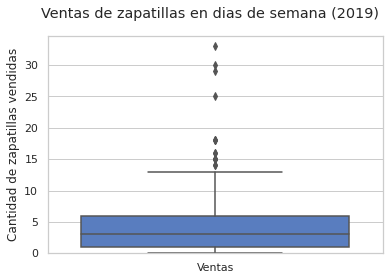

In [812]:
sns.boxplot(data=Dsem)

plt.suptitle("Ventas de zapatillas en dias de semana (2019)")
plt.ylabel("Cantidad de zapatillas vendidas")
plt.ylim(0, None)

plt.show()

Podemos inmediatamente apreciar una gran cantidad de outliers. Ademas una buena parte de la muestra, sobre el 75% se encuentra por debajo de las 10 ventas al dia.

***

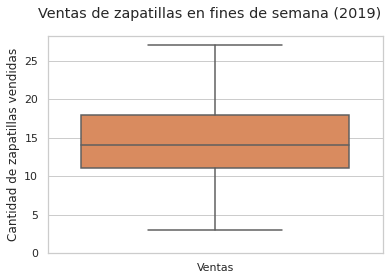

In [813]:
sns.boxplot(data=Dfin, color=sns.color_palette()[1])

plt.suptitle("Ventas de zapatillas en fines de semana (2019)")
plt.ylabel("Cantidad de zapatillas vendidas")
plt.ylim(0, None)

plt.show()

En el caso de los fines de semana, podemos ver una distribucion mucho mas uniforme a lo largo del rango de datos presentes en la muestra. 

***

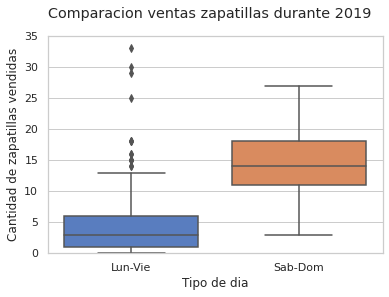

In [814]:
def comp_plot():
    comp = pd.DataFrame({"Lun-Vie":Dsem["Ventas"], "Sab-Dom":Dfin["Ventas"]})

    bp = sns.boxplot(data=comp)

    plt.suptitle("Comparacion ventas zapatillas durante 2019")
    plt.xlabel("Tipo de dia")
    plt.ylabel("Cantidad de zapatillas vendidas")
    plt.ylim(0, 35)
    
comp_plot()
fig.show()

Al tener los graficos lado a lado podemos comenzar a realizar comparaciones. Algunas observaciones validas respecto a estas muestras serian por ejemplo:
* La caja de los datos registrados en $D_{fin}$ estaban completamente sobre los registrados en $D_{sem}.$
* El 75% mas bajo de los datos en $D_{sem}$ se encuentra por debajo del 75% mas alto de $D_{fin}.$
* El dato mas alto registrado en $D_{sem}$ es mas alto que todos los datos registrados en $D_{fin}.$
* El dato mas bajo registrado en $D_{fin}$ es mas alto que el 50% de los datos en $D_{sem}.$
* El 50% mas alto de los datos en $D_{fin}$ esta sobre el bigote superior de $D_{sem}.$

Por lo mismo, podemos concluir que los fines de semana venden por lo general mas zapatilla que los dias de semana, a excepecion de unos pocos dias, esto pueden ser producto de festividades u ofertas durante la semana.

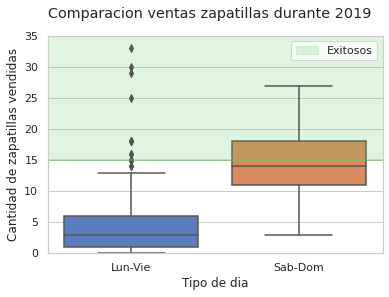

In [815]:
comp_plot()
plt.axhline(y=15, color='g', alpha=0.5)
plt.fill_between((-0.5,1,1.5), 15, 35, color='g', alpha=0.2, label="Exitosos")
plt.legend()
plt.show()

En este grafico podemos estimar con mayor facilidad los procentajes de los datos que se consideran dias "exitosos". Mas del 75% de los dias de semana no son dias exitosos y todos los que se pueden considerar exitos son outliers. Por otro lado casi la mitad de los fines de semana son exitosos.

## Analisis Economico de la situacion
***

Considerando los exitos que tienen los fines de semana una buena idea seria el incrementar el personal durante estos dias para poder satisfacer a todos los clientes. Ademas si consideramos el tamaño de la caja y a la distancia a la que se encuentran del punto que separa los dias exitos, se requiere un menor aumento para hacer que el proximo 25% de los datos sea exitoso. Una consideracion adicional que cabe destacar es que ademas los fines de semana son menos dias, por un lado esto hace que requieran menor inversion, pero por el otro tambien implican que los efectos tardaran mas en acumularse.

## Analisis sobre el total de datos
***

Debido a que las muestras son registros de dias distintos, es decir, son disjuntas, podemos juntar los datos directamente para hacer una nueva muestra. Ademas podemos verficar que la nueva muestra contiene todos los datos de la temporada, par esto calculamos la cardinalidad del nuevo DataFrame.

In [816]:
Dtemp = pd.concat([Dsem,Dfin])
display(Math("$|D_{temp}| = %d$"%len(Dtemp)))

<IPython.core.display.Math object>

Lo cual es la cantidad de dias que hubieron en 2019.

Complemente su análisis con un histograma de la muestra 𝐷𝑡𝑒𝑚𝑝, escoja un valor de 𝐾 apropiado. ¿Las medidas de tendencia y dispersión calculadas anteriormente se mantienen sobre 𝐷𝑡𝑒𝑚𝑝? ¿Los nuevos valores se corresponden con un promedio entre las medidas individuales calculadas sobre cada muestra? ¿Cómo se puede obtener la media muestral de 𝐷𝑡𝑒𝑚𝑝 a través de la media muestral de 𝐷𝑠𝑒𝑚 y 𝐷𝑓𝑖𝑛? 

In [817]:
medidas_Dtemp = {}
medidas_mean = {}

medidas_Dtemp["Media"] = round(Dtemp.mean()[0],1)
medidas_Dtemp["Mediana"] = round(Dtemp.median()[0],1)
medidas_Dtemp["Sesgo"] = Dtemp.mean()[0] - Dtemp.median()[0]
medidas_Dtemp["s"] = round(Dtemp.std()[0], 1)

medidas_mean["Media"] = round(mean([Dsem.mean()[0],Dfin.mean()[0]]), 1)
medidas_mean["Mediana"] = round(mean([Dsem.median()[0],Dfin.median()[0]]), 1)
medidas_mean["Sesgo"] = mean([Dsem.mean()[0]-Dsem.median()[0],Dfin.mean()[0]-Dfin.median()[0]])
medidas_mean["s"] = round(mean([Dsem.std(ddof=1)[0],Dfin.std(ddof=1)[0]]), 1)

pd.DataFrame([medidas_Dtemp, medidas_mean, medidas_Dsem, medidas_Dfin],["$D_{temp}$", "$D_{mean}$","$D_{sem}$","$D_{fin}$"])

,Media,Mediana,Sesgo,s
$D_{temp}$,7.5,5.0,2.482192,6.9
$D_{mean}$,9.7,8.5,1.162319,5.2
$D_{sem}$,4.6,3.0,1.593870,5.2
$D_{fin}$,14.7,14.0,0.730769,5.3


Como era de esperarse podemos ver que tanto los valores valores a lo largo de la temporada no tiene una relacion tan directa con los valores medidos durante la semana y durante los fines de semana. Las medidas de tendencia pueden llegar a ser mas descriptivas de la poblacion, sin embargo, este procedimiento de muestreo no genera muestras representativas. El promedio de las medidas tampoco describen de forma apropiada a la poblacion.

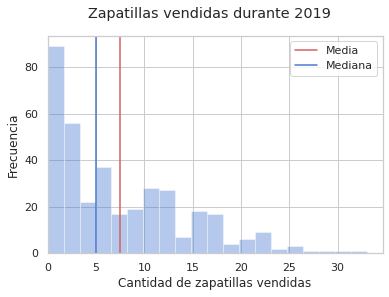

In [818]:
K = ceil(sqrt(len(Dtemp)))

sns.distplot(Dtemp, bins=K, kde=False)

plt.suptitle("Zapatillas vendidas durante 2019")
plt.xlabel("Cantidad de zapatillas vendidas")
plt.xlim(0, None)
plt.ylabel("Frecuencia")

plt.axvline(x=medidas_Dtemp["Media"], label="Media", color='r')
plt.axvline(x=medidas_Dtemp["Mediana"], label="Mediana", color='b')
plt.legend()

plt.show()

***

Pese a que las muestras no representaban correctament la poblacion, es posible determinar la media a partir de las medias de ambas muestras complementarias utilizando la siguiente propiedad:
$$\overline{D_{temp}} =\frac{\overline D_{sem}|D_{sem}| + \overline D_{fin}|D_{fin}|}{|D_{sem}|+|D_{fin}|}$$

In [819]:
media = round((medidas_Dsem["Media"]*len(Dsem)+medidas_Dfin["Media"]*len(Dfin))/(len(Dsem)+len(Dfin)), 1)
pd.DataFrame({"Media": [media, medidas_Dtemp["Media"]]}, ["$D_{sem},\ D{fin}$", "$D_{temp}$"])

,Media
"$D_{sem},\ D{fin}$",7.5
$D_{temp}$,7.5
